# Time series forecasting

# Initial setup

## Import required packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Import time series data: Airline passenger traffic

In [2]:
data = pd.read_csv('data/airline-passenger-traffic.csv', header = None)
data.columns = ['Month','Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.head(12)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


In [3]:
data.shape

(144, 1)

# Time series analysis

## Plot time series data

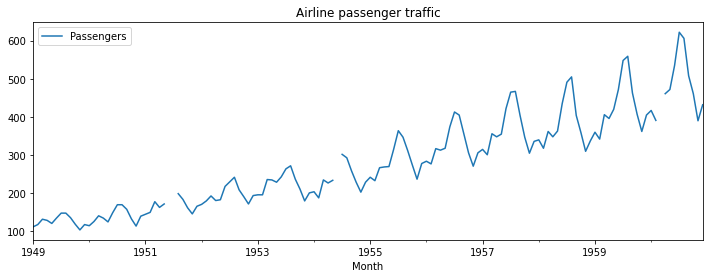

In [4]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic')
plt.show(block=False)

## Missing value treatment

### Mean imputation

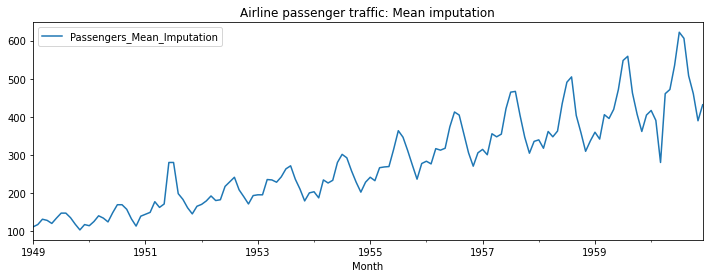

In [5]:
data = data.assign(Passengers_Mean_Imputation=data.Passengers.fillna(data.Passengers.mean()))
data[['Passengers_Mean_Imputation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic: Mean imputation')
plt.show(block=False)

### Linear interpolation

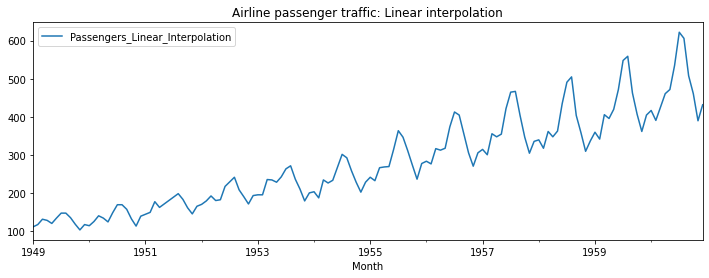

In [22]:
# data = data.assign(Passengers_Linear_Interpolation=data.Passengers.interpolate(method='linear'))
data['Passengers_Linear_Interpolation']=data['Passengers'].interpolate(method='linear')
data[['Passengers_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic: Linear interpolation')
plt.show(block=False)

In [7]:
data.head()

,Passengers,Passengers_Mean_Imputation,Passengers_Linear_Interpolation
Month,,,
1949-01-01,112.0,112.0,112.0
1949-02-01,118.0,118.0,118.0
1949-03-01,132.0,132.0,132.0
1949-04-01,129.0,129.0,129.0
1949-05-01,121.0,121.0,121.0


### Use linear interpolation to impute missing values

In [8]:
data['Passengers'] = data['Passengers_Linear_Interpolation']
data.drop(columns=['Passengers_Mean_Imputation','Passengers_Linear_Interpolation'],inplace=True)

## Outlier detection

### Box plot and interquartile range

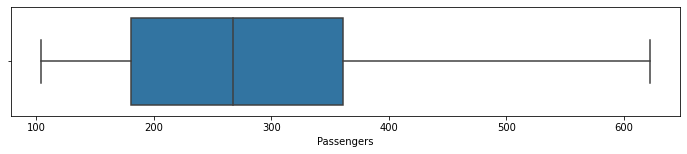

In [9]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Passengers'],whis=1.5)

### Histogram plot

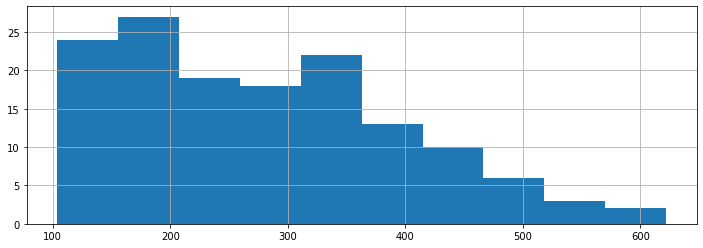

In [10]:
fig = data.Passengers.hist(figsize = (12,4))

## Time series Decomposition

### Additive seasonal decomposition

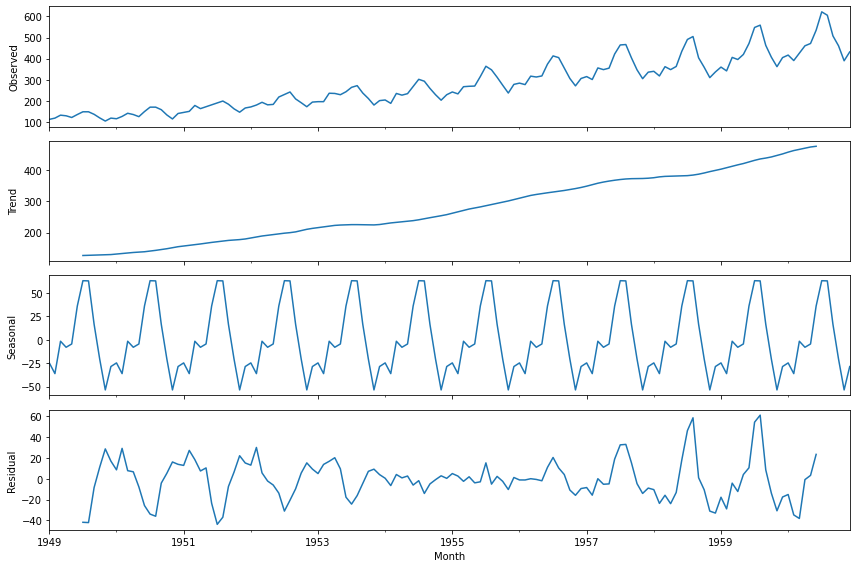

In [11]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

### Multiplicative seasonal decomposition

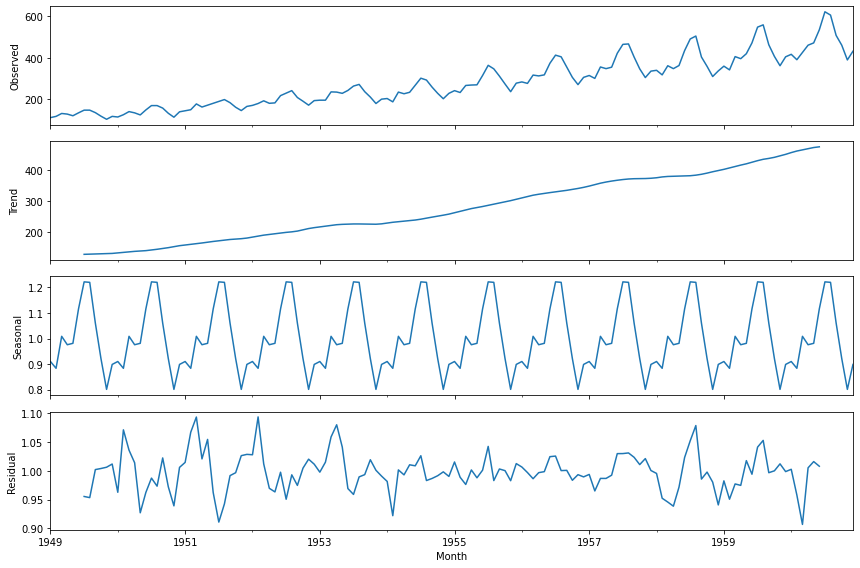

In [12]:
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

# Build and evaluate time series forecast

## Split time series data into training and test set

In [13]:
train_len = 120
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

# Simple time series methods

## Naive method

In [14]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

### Plot train, test and forecast

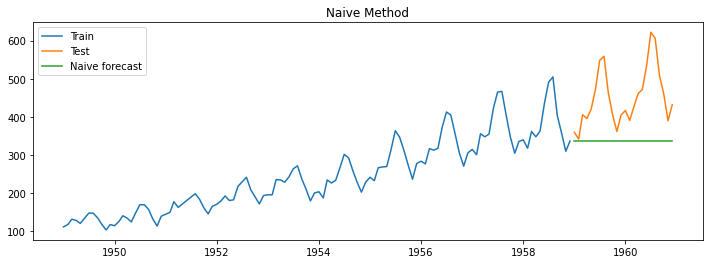

In [15]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [16]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_naive['naive_forecast'])/test['Passengers'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63


## Simple average method

In [17]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

### Plot train, test and forecast

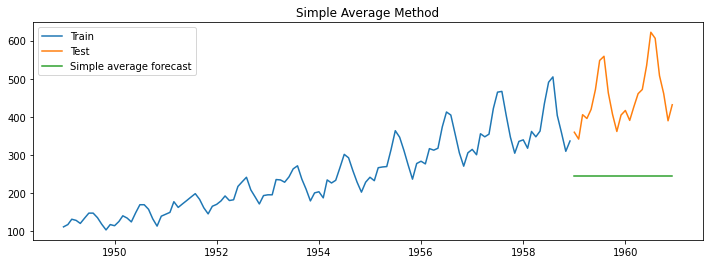

In [18]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate RMSE and MAPE

In [19]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_avg['avg_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28


## Simple moving average method

In [23]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot train, test and forecast

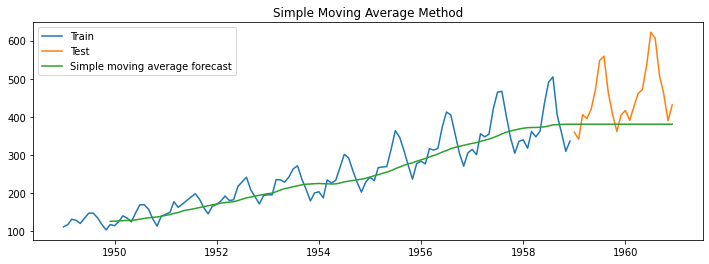

In [24]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [25]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast - 12'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast - 12,103.33,15.54


# Exponential smoothing methods

## Simple exponential smoothing

In [26]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

/Users/sreedevigattu/sree/PGDS/MachineLearning/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


### Plot train, test and forecast

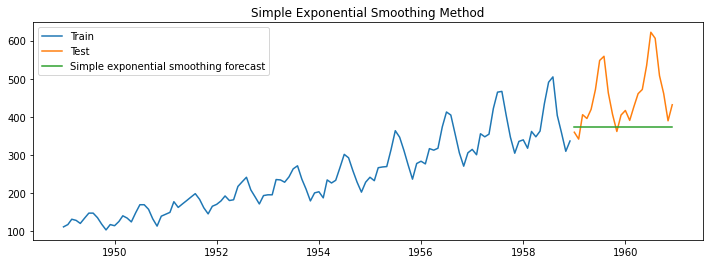

In [27]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [28]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ses['ses_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast - 12,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49


In [29]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Passengers'])

model_fit = model.fit(smoothing_level=0.5,optimized=False)
y_hat_ses['ses_forecast-0.5'] = model_fit.forecast(24)

model_fit = model.fit(smoothing_level=0.8,optimized=False)
y_hat_ses['ses_forecast-0.8'] = model_fit.forecast(24)

/Users/sreedevigattu/sree/PGDS/MachineLearning/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [30]:
train['Passengers'][train.shape[0]-1]

337.0

In [31]:
y_hat_ses[['ses_forecast', 'ses_forecast-0.5', 'ses_forecast-0.8']].head()

,ses_forecast,ses_forecast-0.5,ses_forecast-0.8
Month,,,
1959-01-01,374.897327,345.749205,334.072579
1959-02-01,374.897327,345.749205,334.072579
1959-03-01,374.897327,345.749205,334.072579
1959-04-01,374.897327,345.749205,334.072579
1959-05-01,374.897327,345.749205,334.072579


## Holt's method with trend

In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Passengers'])  ,trend='additive', seasonal=None) #,seasonal_periods=12
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 112.0, 'initial_slope': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

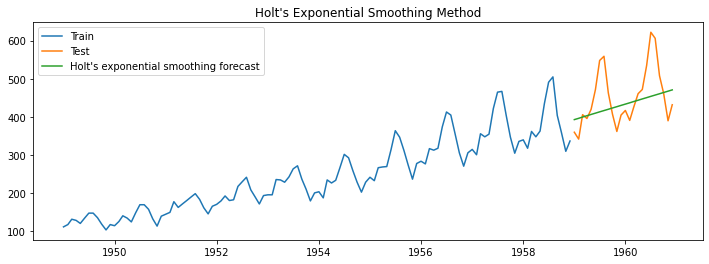

In [33]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RSME and MAPE

In [35]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_holt['holt_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast - 12,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,71.94,11.11
0,Holt's exponential smoothing method,71.94,11.11


## Holt Winters' additive method with trend and seasonality

In [36]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.2631578931410023, 'smoothing_slope': 0.05162965362003379, 'smoothing_seasonal': 0.7368421036673181, 'damping_slope': nan, 'initial_level': 211.55099371227195, 'initial_slope': 1.7391959241879844, 'initial_seasons': array([-100.18118278,  -94.20464628,  -80.29175487,  -83.41758377,
        -91.4590812 ,  -77.45094377,  -64.48324418,  -64.5734069 ,
        -76.66644369,  -93.73584385, -108.67611165,  -94.50947787]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/sreedevigattu/sree/PGDS/MachineLearning/venv/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


### Plot train, test and forecast

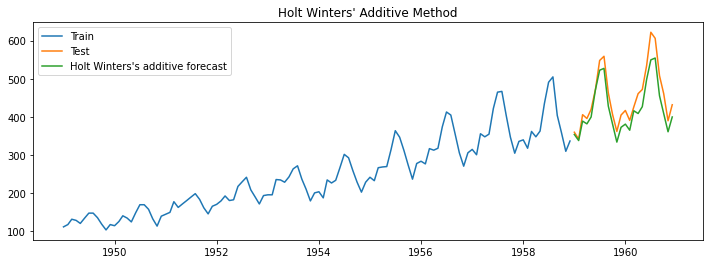

In [37]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate RMSE and MAPE

In [38]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwa['hw_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast - 12,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,71.94,11.11
0,Holt's exponential smoothing method,71.94,11.11
0,Holt Winters' additive method,35.10,6.53


## Holt Winter's multiplicative method with trend and seasonality

In [39]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.3854752059775655, 'smoothing_slope': 0.03532512198726199, 'smoothing_seasonal': 0.6145247765854112, 'damping_slope': nan, 'initial_level': 212.39826377189243, 'initial_slope': 1.1085061808204044, 'initial_seasons': array([0.51829335, 0.54671337, 0.60341361, 0.57043893, 0.52096774,
       0.57300963, 0.62819598, 0.62585915, 0.57016694, 0.49504925,
       0.43957122, 0.51435141]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

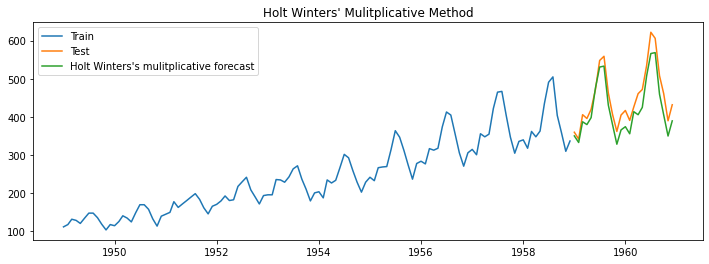

In [40]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

### Calculate RMSE and MAPE

In [41]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwm['hw_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast - 12,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,71.94,11.11
0,Holt's exponential smoothing method,71.94,11.11
0,Holt Winters' additive method,35.10,6.53
0,Holt Winters' multiplicative method,34.81,6.91


# Questions

### Metrail

In [817]:
df_metrail = pd.read_csv("data/Metrail+dataset.csv")
print(df_metrail.shape[0], df_metrail["Travellers('000)"].isnull().sum(), df_metrail["Travellers('000)"].mean())

df_metrail["Travellers('000)_ffill"] = df_metrail["Travellers('000)"].fillna(method='ffill')
print(df_metrail.shape[0], df_metrail["Travellers('000)"].isnull().sum(), df_metrail["Travellers('000)_ffill"].mean())

df_metrail["Travellers('000)_bfill"] = df_metrail["Travellers('000)"].fillna(method='bfill')
print(df_metrail.shape[0], df_metrail["Travellers('000)"].isnull().sum(), df_metrail["Travellers('000)_bfill"].mean())

df_metrail = df_metrail.assign(Travellers_linear=df_metrail["Travellers('000)"].interpolate(method='linear'))
print(df_metrail.shape[0], df_metrail["Travellers('000)"].isnull().sum(), df_metrail["Travellers_linear"].mean())
df_metrail.head()

159 11 1837.5472972972973
159 11 1838.685534591195
159 11 1834.446540880503
159 11 1836.566037735849


,Month,Travellers('000),Travellers('000)_ffill,Travellers('000)_bfill,Travellers_linear
0,Jan-91,1724.0,1724.0,1724.0,1724.0
1,Feb-91,1638.0,1638.0,1638.0,1638.0
2,Mar-91,1987.0,1987.0,1987.0,1987.0
3,Apr-91,1825.0,1825.0,1825.0,1825.0
4,May-91,NaN,1825.0,1879.0,1852.0


### Exchange Rate

#### Read and process data

In [818]:
df_exch = pd.read_csv("data/exchange-rate-twi.csv");df_exch
col = 'Exchange Rate TWI'
print(df_exch.shape[0], df_exch[col].isnull().sum(), df_exch[col].mean())

304 0 78.60032894736842


In [819]:
train_len = 212
df_exch_train = df_exch[0:train_len] # first 120 months as training set
df_exch_test = df_exch[train_len:] # last 24 months as out-of-time test set
df_exch_train.head()

,Month,Exchange Rate TWI
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2


In [820]:
y_hat = df_exch_test.copy()

#### Simple Average

In [821]:
y_hat['avg_forecast'] = df_exch_train[col].mean()
y_hat['avg_forecast']

212    88.325472
213    88.325472
214    88.325472
215    88.325472
216    88.325472
         ...    
299    88.325472
300    88.325472
301    88.325472
302    88.325472
303    88.325472
Name: avg_forecast, Length: 92, dtype: float64

In [822]:
rmse = np.sqrt(mean_squared_error(df_exch_test[col], y_hat['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(df_exch_test[col]-y_hat['avg_forecast'])/df_exch_test[col])*100,2)
print(f"Forecast - Average: rmse: {rmse}, mape: {mape}, accuracy: {100-mape}")

Forecast - Average: rmse: 32.42, mape: 58.12, accuracy: 41.88


#### Naive method

In [823]:
#y_hat_naive = df_exch_train.copy()
y_hat['naive_forecast'] = df_exch_train[col][train_len-1]
y_hat['naive_forecast']

212    52.0
213    52.0
214    52.0
215    52.0
216    52.0
       ... 
299    52.0
300    52.0
301    52.0
302    52.0
303    52.0
Name: naive_forecast, Length: 92, dtype: float64

In [824]:
rmse = np.sqrt(mean_squared_error(df_exch_test[col], y_hat['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(df_exch_test[col]-y_hat['naive_forecast'])/df_exch_test[col])*100,2)
print(f"Forecast - Naive: rmse: {rmse}, mape: {mape}, accuracy: {100-mape}")

Forecast - Naive: rmse: 5.98, mape: 8.41, accuracy: 91.59


In [825]:
print('y_hat', y_hat.shape)

y_hat (92, 4)


#### Simple Moving Average

In [826]:
y_hat_sma = df_exch.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = df_exch[col].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

y_hat_sma_test = y_hat_sma['sma_forecast'][train_len:]
rmse = np.sqrt(mean_squared_error(df_exch_test[col], y_hat_sma_test)).round(2)
mape = np.round(np.mean(np.abs(df_exch_test[col]-y_hat_sma_test)/df_exch_test[col])*100,2)

print(f"Forecast - Simple Moving Average - {ma_window}: rmse: {rmse}, mape: {mape}, accuracy: {100-mape}")

Forecast - Simple Moving Average - 12: rmse: 4.66, mape: 6.96, accuracy: 93.04


In [827]:
y_hat_sma = df_exch.copy()
ma_window = 6
y_hat_sma['sma_forecast'] = df_exch[col].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

y_hat_sma_test = y_hat_sma['sma_forecast'][train_len:]
rmse = np.sqrt(mean_squared_error(df_exch_test[col], y_hat_sma_test)).round(2)
mape = np.round(np.mean(np.abs(df_exch_test[col]-y_hat_sma_test)/df_exch_test[col])*100,2)

print(f"Forecast - Simple Moving Average - {ma_window}: rmse: {rmse}, mape: {mape}, accuracy: {100-mape}")

Forecast - Simple Moving Average - 6: rmse: 4.9, mape: 7.13, accuracy: 92.87


In [828]:
y_hat_sma = df_exch.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = df_exch[col].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

y_hat_sma_test = y_hat_sma['sma_forecast'][train_len:]
rmse = np.sqrt(mean_squared_error(df_exch_test[col], y_hat_sma_test)).round(2)
mape = np.round(np.mean(np.abs(df_exch_test[col]-y_hat_sma_test)/df_exch_test[col])*100,2)

print(f"Forecast - Simple Moving Average - {ma_window}: rmse: {rmse}, mape: {mape}, accuracy: {100-mape}")

Forecast - Simple Moving Average - 3: rmse: 5.98, mape: 8.41, accuracy: 91.59


### Daily Temperature

#### Read and process data

In [829]:
df_temp = pd.read_csv('data/Daily+temperature+data.csv')
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              730 non-null    object 
 1   Temperature(Min)  730 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.5+ KB


In [830]:
df_temp.head()

,Date,Temperature(Min)
0,01-01-2017,14.3
1,01-02-2017,17.4
2,01-03-2017,18.5
3,01-04-2017,16.8
4,01-05-2017,11.5


In [831]:
LEN_TRAIN = 511; LEN_TEST = df_temp.shape[0] - LEN_TRAIN
print(LEN_TRAIN, LEN_TEST)
df_temp_train = df_temp[0:LEN_TRAIN]; print(df_temp_train.head())
df_temp_test  = df_temp[LEN_TRAIN:]; print(df_temp_test.head())
COL = 'Temperature(Min)'

511 219
         Date  Temperature(Min)
0  01-01-2017              14.3
1  01-02-2017              17.4
2  01-03-2017              18.5
3  01-04-2017              16.8
4  01-05-2017              11.5
          Date  Temperature(Min)
511  5/27/2018               8.2
512  5/28/2018               6.1
513  5/29/2018               4.5
514  5/30/2018               6.1
515  5/31/2018               9.8


#### Simple Exponential Smoothing

In [832]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(df_temp_train[COL])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
print(model_fit.params)

y_hat_actual                    = df_temp_test.copy()
y_hat_actual['ses_forecast']    = model_fit.forecast(LEN_TEST)

{'smoothing_level': 0.2, 'smoothing_trend': None, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 14.3, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [833]:
y_hat_actual.head()

,Date,Temperature(Min),ses_forecast
511,5/27/2018,8.2,9.1997
512,5/28/2018,6.1,9.1997
513,5/29/2018,4.5,9.1997
514,5/30/2018,6.1,9.1997
515,5/31/2018,9.8,9.1997


In [834]:
y_hat_actual['ses_forecast'].shape

(219,)

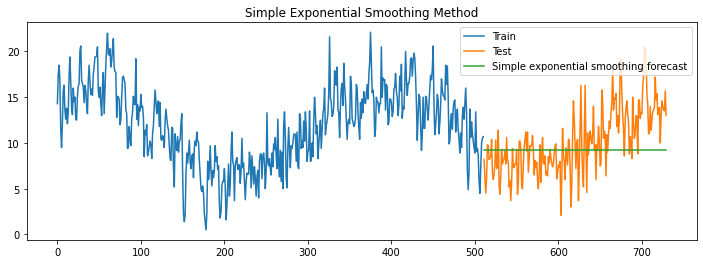

In [835]:
plt.figure(figsize=(12,4))
plt.plot(df_temp_train[COL], label='Train')
plt.plot(df_temp_test[COL], label='Test')
plt.plot(y_hat_actual['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [836]:
df_temp_test[COL].head()

511    8.2
512    6.1
513    4.5
514    6.1
515    9.8
Name: Temperature(Min), dtype: float64

In [837]:
y_hat_actual['ses_forecast'].head()

511    9.1997
512    9.1997
513    9.1997
514    9.1997
515    9.1997
Name: ses_forecast, dtype: float64

In [840]:
rmse = np.sqrt(mean_squared_error(y_hat_actual[COL], y_hat_actual['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(y_hat_actual[COL]-y_hat_actual['ses_forecast'])/y_hat_actual[COL])*100,2)
print(f"Forecast - Simple exponential smoothing forecast: rmse: {rmse}, mape: {mape}, accuracy: {100-mape}")

Forecast - Simple exponential smoothing forecast: rmse: 3.56, mape: 30.24, accuracy: 69.76


In [839]:
rmse = np.sqrt(mean_squared_error(df_temp_test[COL], y_hat_actual['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(df_temp_test[COL]-y_hat_actual['ses_forecast'])/df_temp_test[COL])*100,2)
print(f"Forecast - Simple exponential smoothing forecast: rmse: {rmse}, mape: {mape}, accuracy: {100-mape}")

Forecast - Simple exponential smoothing forecast: rmse: 3.56, mape: 30.24, accuracy: 69.76


In [ ]:
l = 0.5*310 + 0.5 * (263.29 + 19.63); print(l)

In [ ]:
b = 0.1 * (296.46-263.29) + (0.9)*19.63; print(b)

#### Holts' method 

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(df_temp_train[COL]),trend='add', seasonal=None) #,seasonal_periods=90
model_fit = model.fit(smoothing_level=0.5, smoothing_slope=0.01, optimized=False)
print(model_fit.params)

y_hat_actual = df_temp_test.copy()
y_hat_actual['holt_forecast'] = model_fit.forecast(LEN_TEST)

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df_temp_train[COL], label='Train')
plt.plot(df_temp_test[COL], label='Test')
plt.plot(y_hat_actual['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(df_temp_test[COL], y_hat_actual['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(df_temp_test[COL]-y_hat_actual['holt_forecast'])/df_temp_test[COL])*100,2)

print(f"Forecast - Holt\'s Exponential Smoothing forecast: rmse: {rmse}, mape: {mape}, accuracy: {100-mape}")

#### Holt Winters' additive method with trend and seasonality

In [ ]:
#y_hat_hwa = df_temp_test.copy()
model = ExponentialSmoothing(np.asarray(df_temp_train[COL]) ,seasonal_periods=30 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_actual['hw_forecast'] = model_fit.forecast(LEN_TEST)

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df_temp_train[COL], label='Train')
plt.plot(df_temp_test[COL], label='Test')
plt.plot(y_hat_actual['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(df_temp_test[COL], y_hat_actual['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(df_temp_test[COL]-y_hat_actual['hw_forecast'])/df_temp_test[COL])*100,2)

print(f"Forecast - Holt Winters' additive method with trend and seasonality forecast: rmse: {rmse}, mape: {mape}, accuracy: {100-mape}")

## Bitcoin

#### Read and process data

In [ ]:
df_bc = pd.read_csv('data/bitcoin.csv',header=None)
df_bc.info()

In [ ]:
df_bc.columns = ['months', 'price']
df_bc.head()

In [ ]:
LEN_TRAIN = 29; LEN_TEST = df_bc.shape[0] - LEN_TRAIN
print(LEN_TRAIN, LEN_TEST)
df_bc_train = df_bc[0:LEN_TRAIN]; print(df_bc_train.head())
df_bc_test  = df_bc[LEN_TRAIN:]; print(df_bc_test.head())
COL = 'price'

In [ ]:
y_hat = df_bc_test.copy()

In [ ]:
def errors(method, actual, forecast):
    rmse = np.sqrt(mean_squared_error(actual, forecast)).round(2)
    mape = np.round(np.mean(np.abs(actual-forecast)/actual)*100,2)
    print(f"Forecast {method}: rmse: {rmse}, mape: {mape}, accuracy: {100-mape}")
    return rmse, mape

#### Naive, simple average & simple moving average methods

In [ ]:
forecast = df_bc_train[COL][LEN_TRAIN-1];                    print("naive_forecast", forecast);   y_hat['naive_forecast']     = forecast
forecast = df_bc_train[COL].mean();                          print("avg_forecast",forecast );     y_hat['avg_forecast']       = forecast
forecast = df_bc_train[COL].rolling(12).mean()[LEN_TRAIN-1]; print('sma_forecast-12', forecast);  y_hat['sma_forecast-12']    = forecast
forecast = df_bc_train[COL].rolling(6).mean()[LEN_TRAIN-1]; print('sma_forecast-6', forecast);    y_hat['sma_forecast-6']     = forecast
forecast = df_bc_train[COL].rolling(3).mean()[LEN_TRAIN-1]; print('sma_forecast-3', forecast);    y_hat['sma_forecast-3']     = forecast
y_hat

In [ ]:
errors("Naive", df_bc_test['price'], y_hat['naive_forecast'])
errors("Average", df_bc_test['price'], y_hat['avg_forecast'])
errors("Moving Average-12", df_bc_test['price'], y_hat['sma_forecast-12'])
errors("Moving Average-6", df_bc_test['price'], y_hat['sma_forecast-6'])
errors("Moving Average-3", df_bc_test['price'], y_hat['sma_forecast-3'])

#### Simple Exponential Smoothing

In [ ]:
model       = SimpleExpSmoothing(df_bc_train[COL])
model_fit   = model.fit(optimized=True)
print(model_fit.params)

y_hat['ses_forecast']    = model_fit.forecast(LEN_TEST)
y_hat

In [ ]:
errors("Simple Exponential Smoothing", df_bc_test['price'], model_fit.forecast(LEN_TEST)) #y_hat['naive_forecast'])

#### Holt's method

In [ ]:
model       = ExponentialSmoothing(np.asarray(df_bc_train[COL]),trend='add', seasonal=None) #,seasonal_periods=90
model_fit   = model.fit(optimized=True) #smoothing_level=0.5, smoothing_slope=0.01, 
print(model_fit.params)

#model_fit.forecast(LEN_TEST)
y_hat['holt_forecast'] = model_fit.forecast(LEN_TEST)
y_hat

In [ ]:
_ = errors("Holt's method", df_bc_test['price'],y_hat['holt_forecast']) 

#### Holt Winters' additive method

In [ ]:
model = ExponentialSmoothing(np.asarray(df_bc_train[COL]) ,seasonal_periods=3, trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
#model_fit.forecast(LEN_TEST)
y_hat['hw_forecast_add'] = model_fit.forecast(LEN_TEST)
_ = errors("Holt Winter's - additive method", df_bc_test['price'],y_hat['hw_forecast_add']) 

In [ ]:
model = ExponentialSmoothing(np.asarray(df_bc_train[COL]) ,seasonal_periods=3, trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
#model_fit.forecast(LEN_TEST)
y_hat['hw_forecast_mul'] = model_fit.forecast(LEN_TEST)
_ = errors("Holt Winter's - mulitplicative method", df_bc_test['price'],y_hat['hw_forecast_mul']) 

In [ ]:
y_hat